### Load Data:

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston_dataset = load_boston()

### Describe Data:

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Prepare Data:

In [4]:
import pandas as pd

In [5]:
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

#### TAX/RAD Correlation:

In [6]:
tax_rad_corr = data['TAX'].corr(data['RAD'])

In [7]:
tax_rad_corr

0.9102281885331845

In [8]:
rad_tax_corr = data['RAD'].corr(data['TAX'])

In [9]:
rad_tax_corr

0.9102281885331845

### Vizualize Data:

#### Using Matplotlib's Scatter Plot:

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

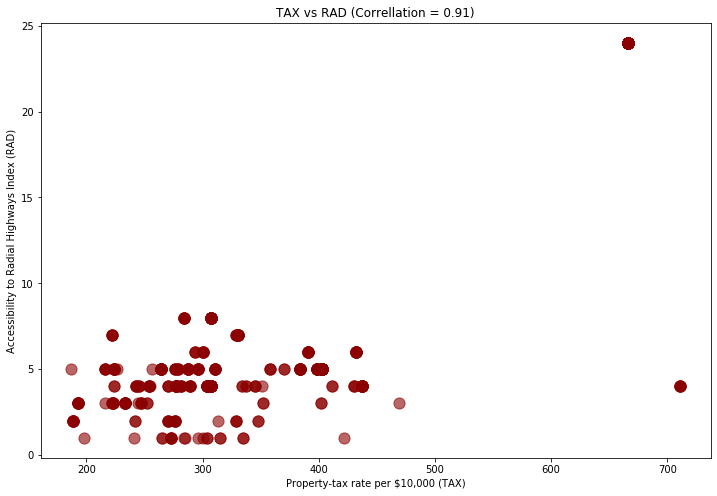

In [11]:
dotsize = 125

plt.figure(figsize=(12,8))
plt.scatter(x=data['TAX'], y=data['RAD'], alpha=0.6, s=dotsize, color='darkred')
plt.title(f'TAX vs RAD (Correllation = {round(tax_rad_corr, 3)})')
plt.xlabel('Property-tax rate per $10,000 (TAX)')
plt.ylabel('Accessibility to Radial Highways Index (RAD)')
plt.show()

#### Using Seaborn:

In [12]:
import seaborn as sns

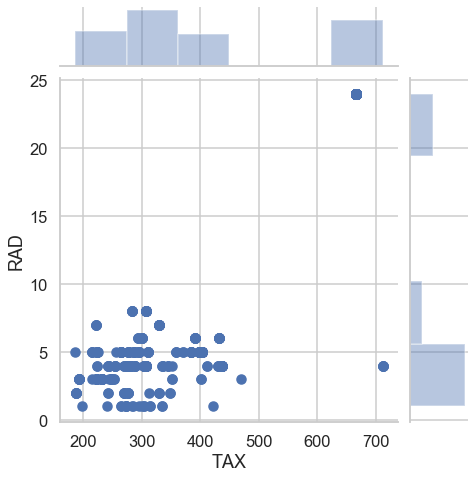

In [13]:
sns.set() # resets styling from up above
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7)
plt.show()

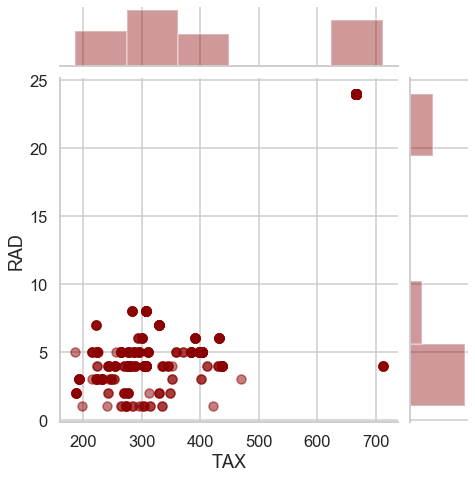

In [14]:
sns.set() # resets styling from up above
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color='darkred', joint_kws={'alpha':0.5})
plt.show()

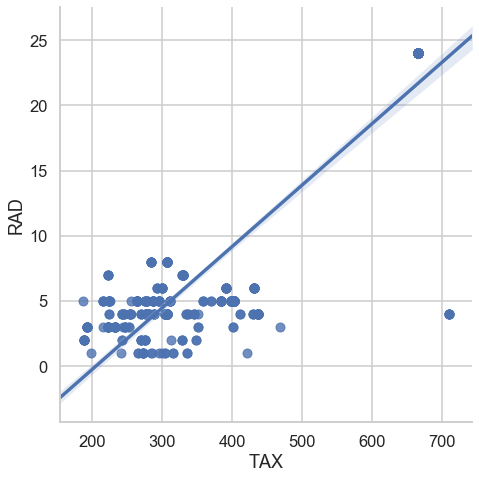

In [15]:
sns.lmplot(x='TAX', y='RAD', data=data, height=7)
plt.show()

In [16]:
data['PRICE'] = boston_dataset.target

In [17]:
room_target_corr = data['RM'].corr(data['PRICE'])

In [18]:
room_target_corr

0.695359947071539

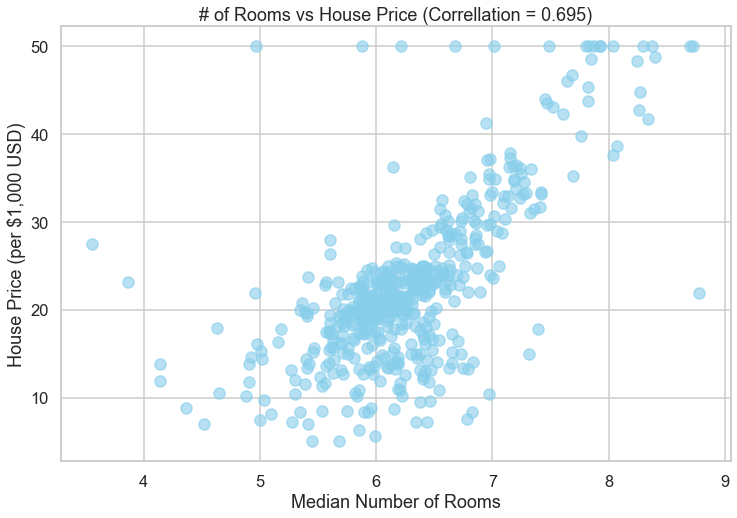

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=dotsize, color='skyblue')
plt.title(f'# of Rooms vs House Price (Correllation = {round(room_target_corr, 3)})')
plt.xlabel('Median Number of Rooms')
plt.ylabel('House Price (per $1,000 USD)')
plt.show()

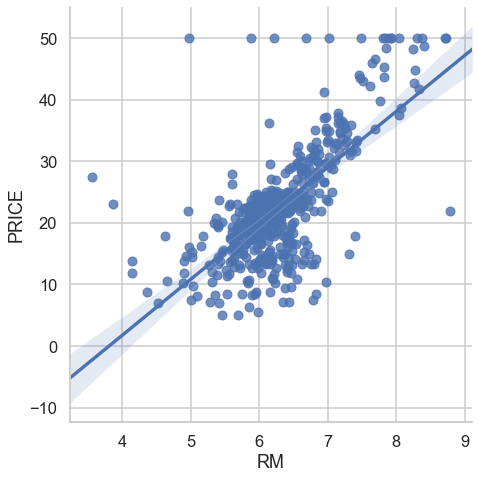

In [20]:
sns.lmplot(x='RM', y='PRICE', data=data, height=7)
plt.show()

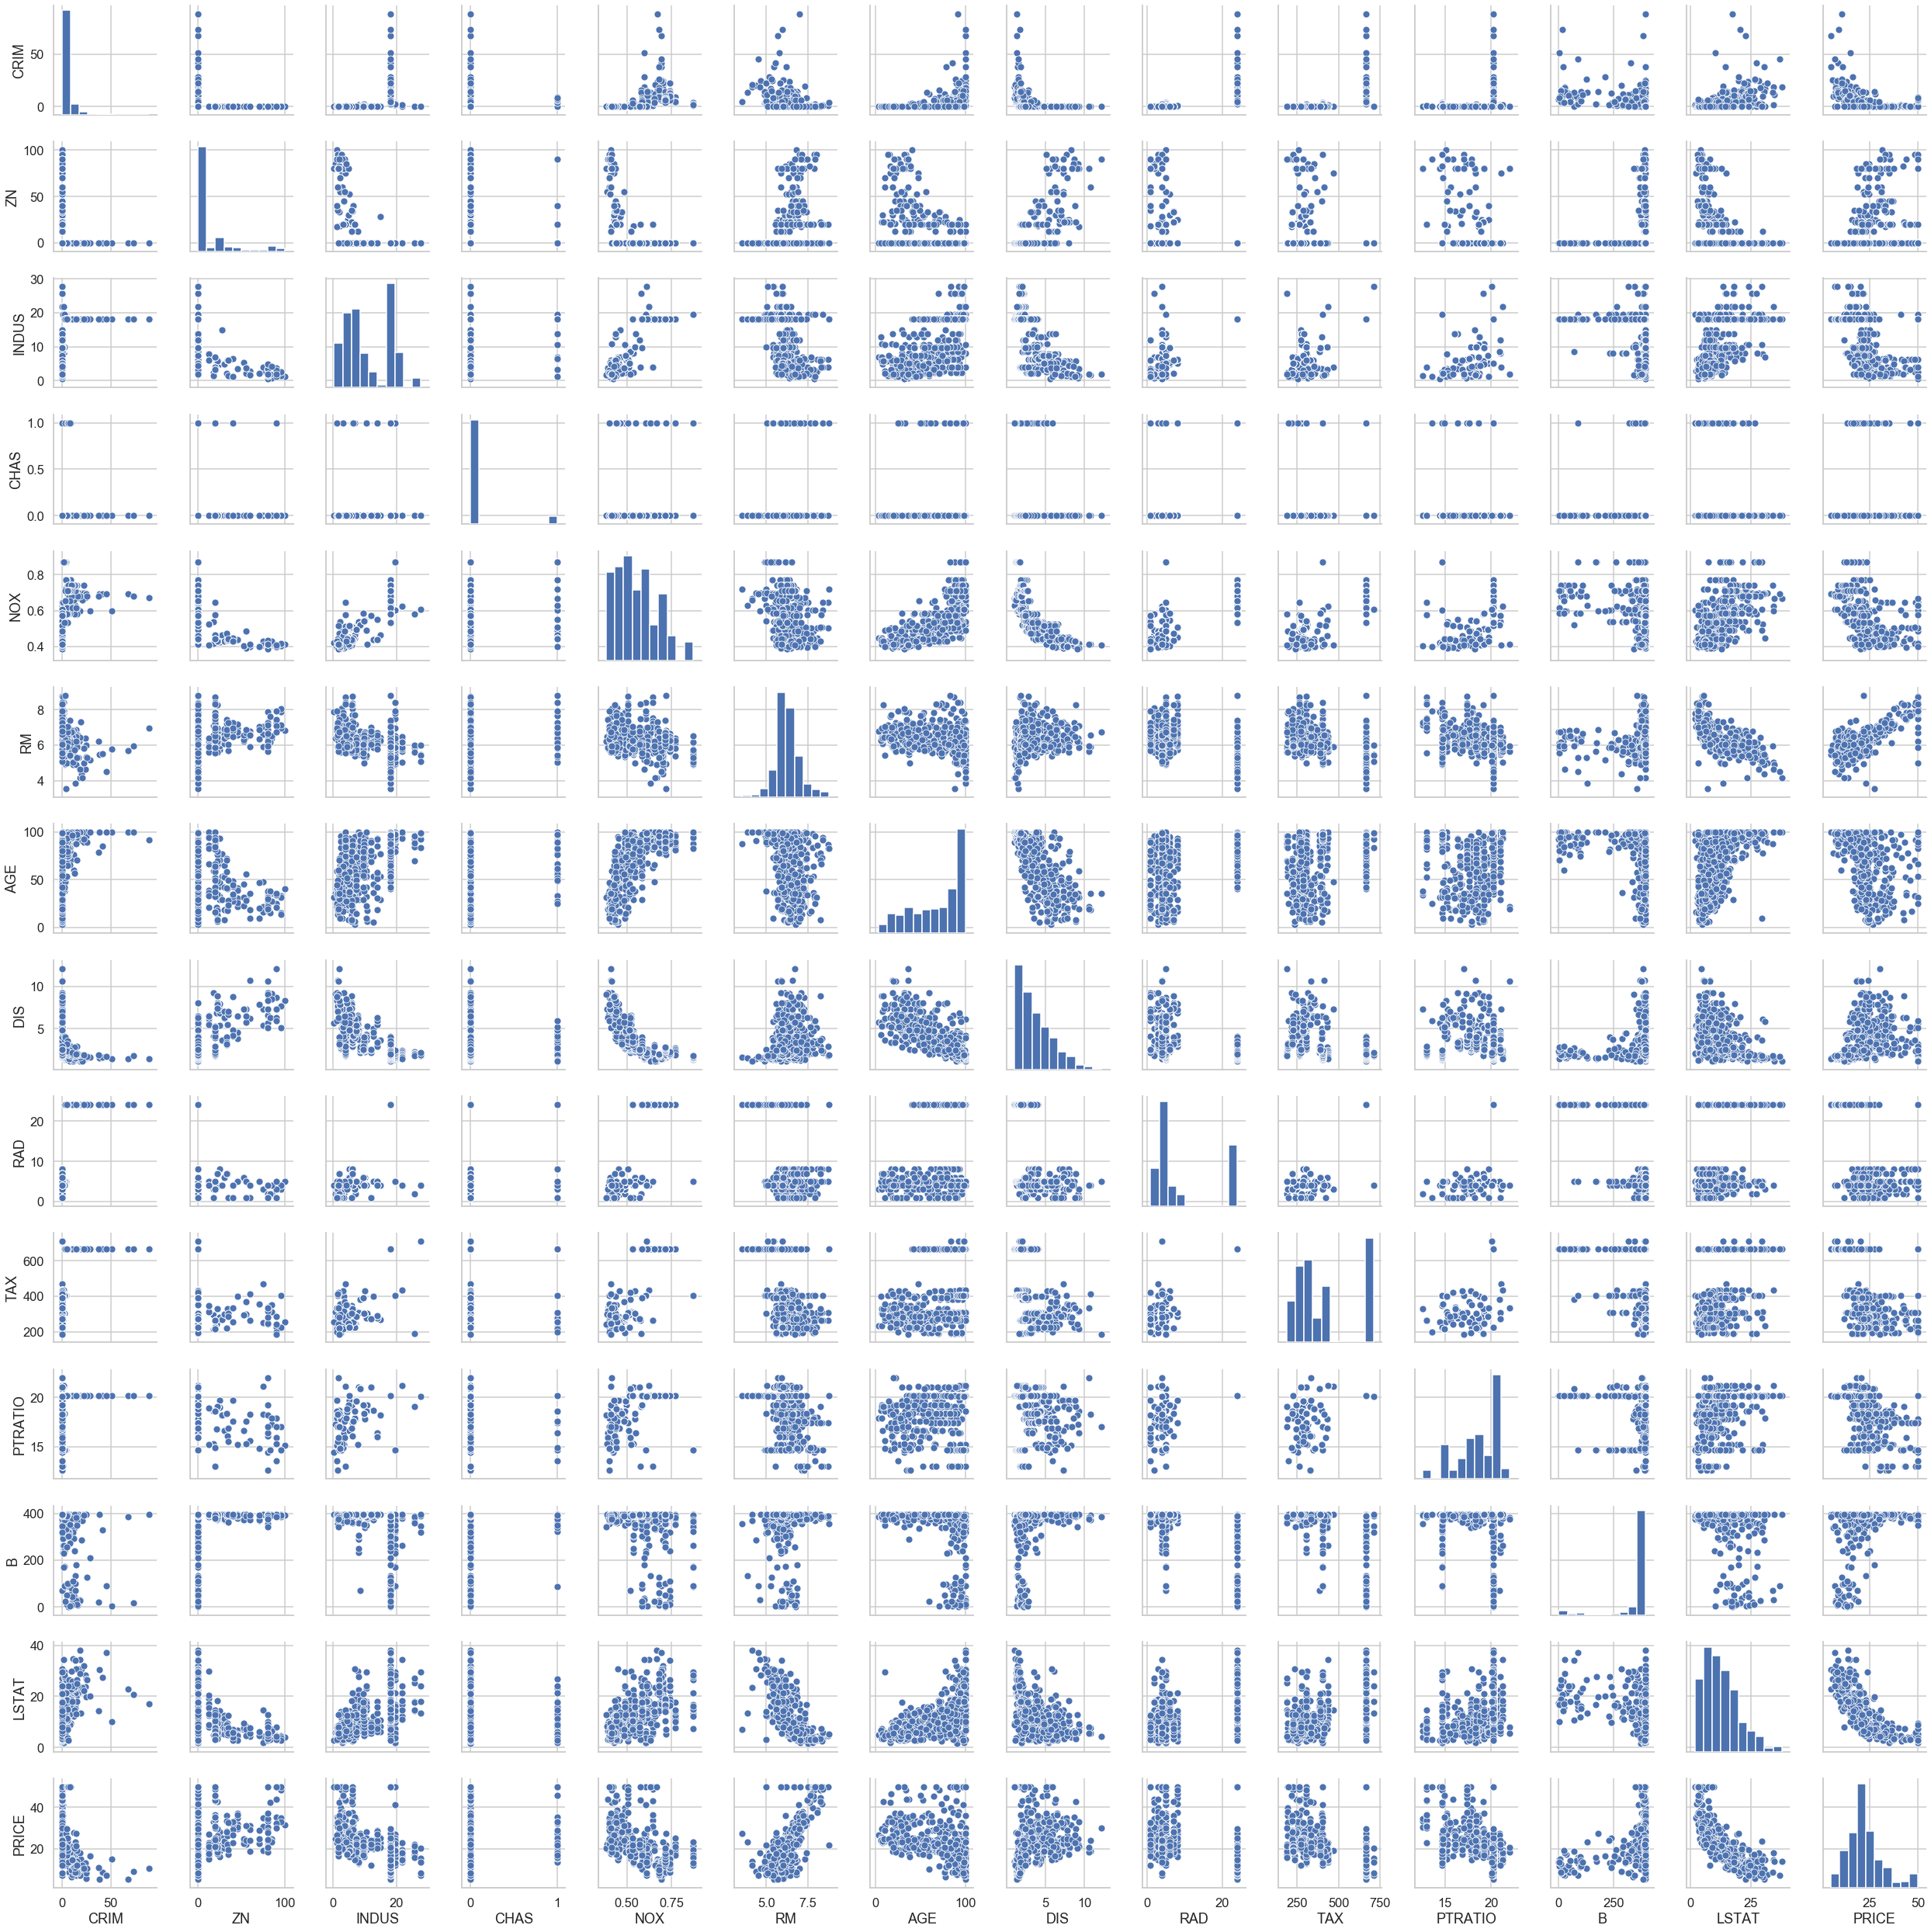

In [21]:
sns.pairplot(data)
plt.show()

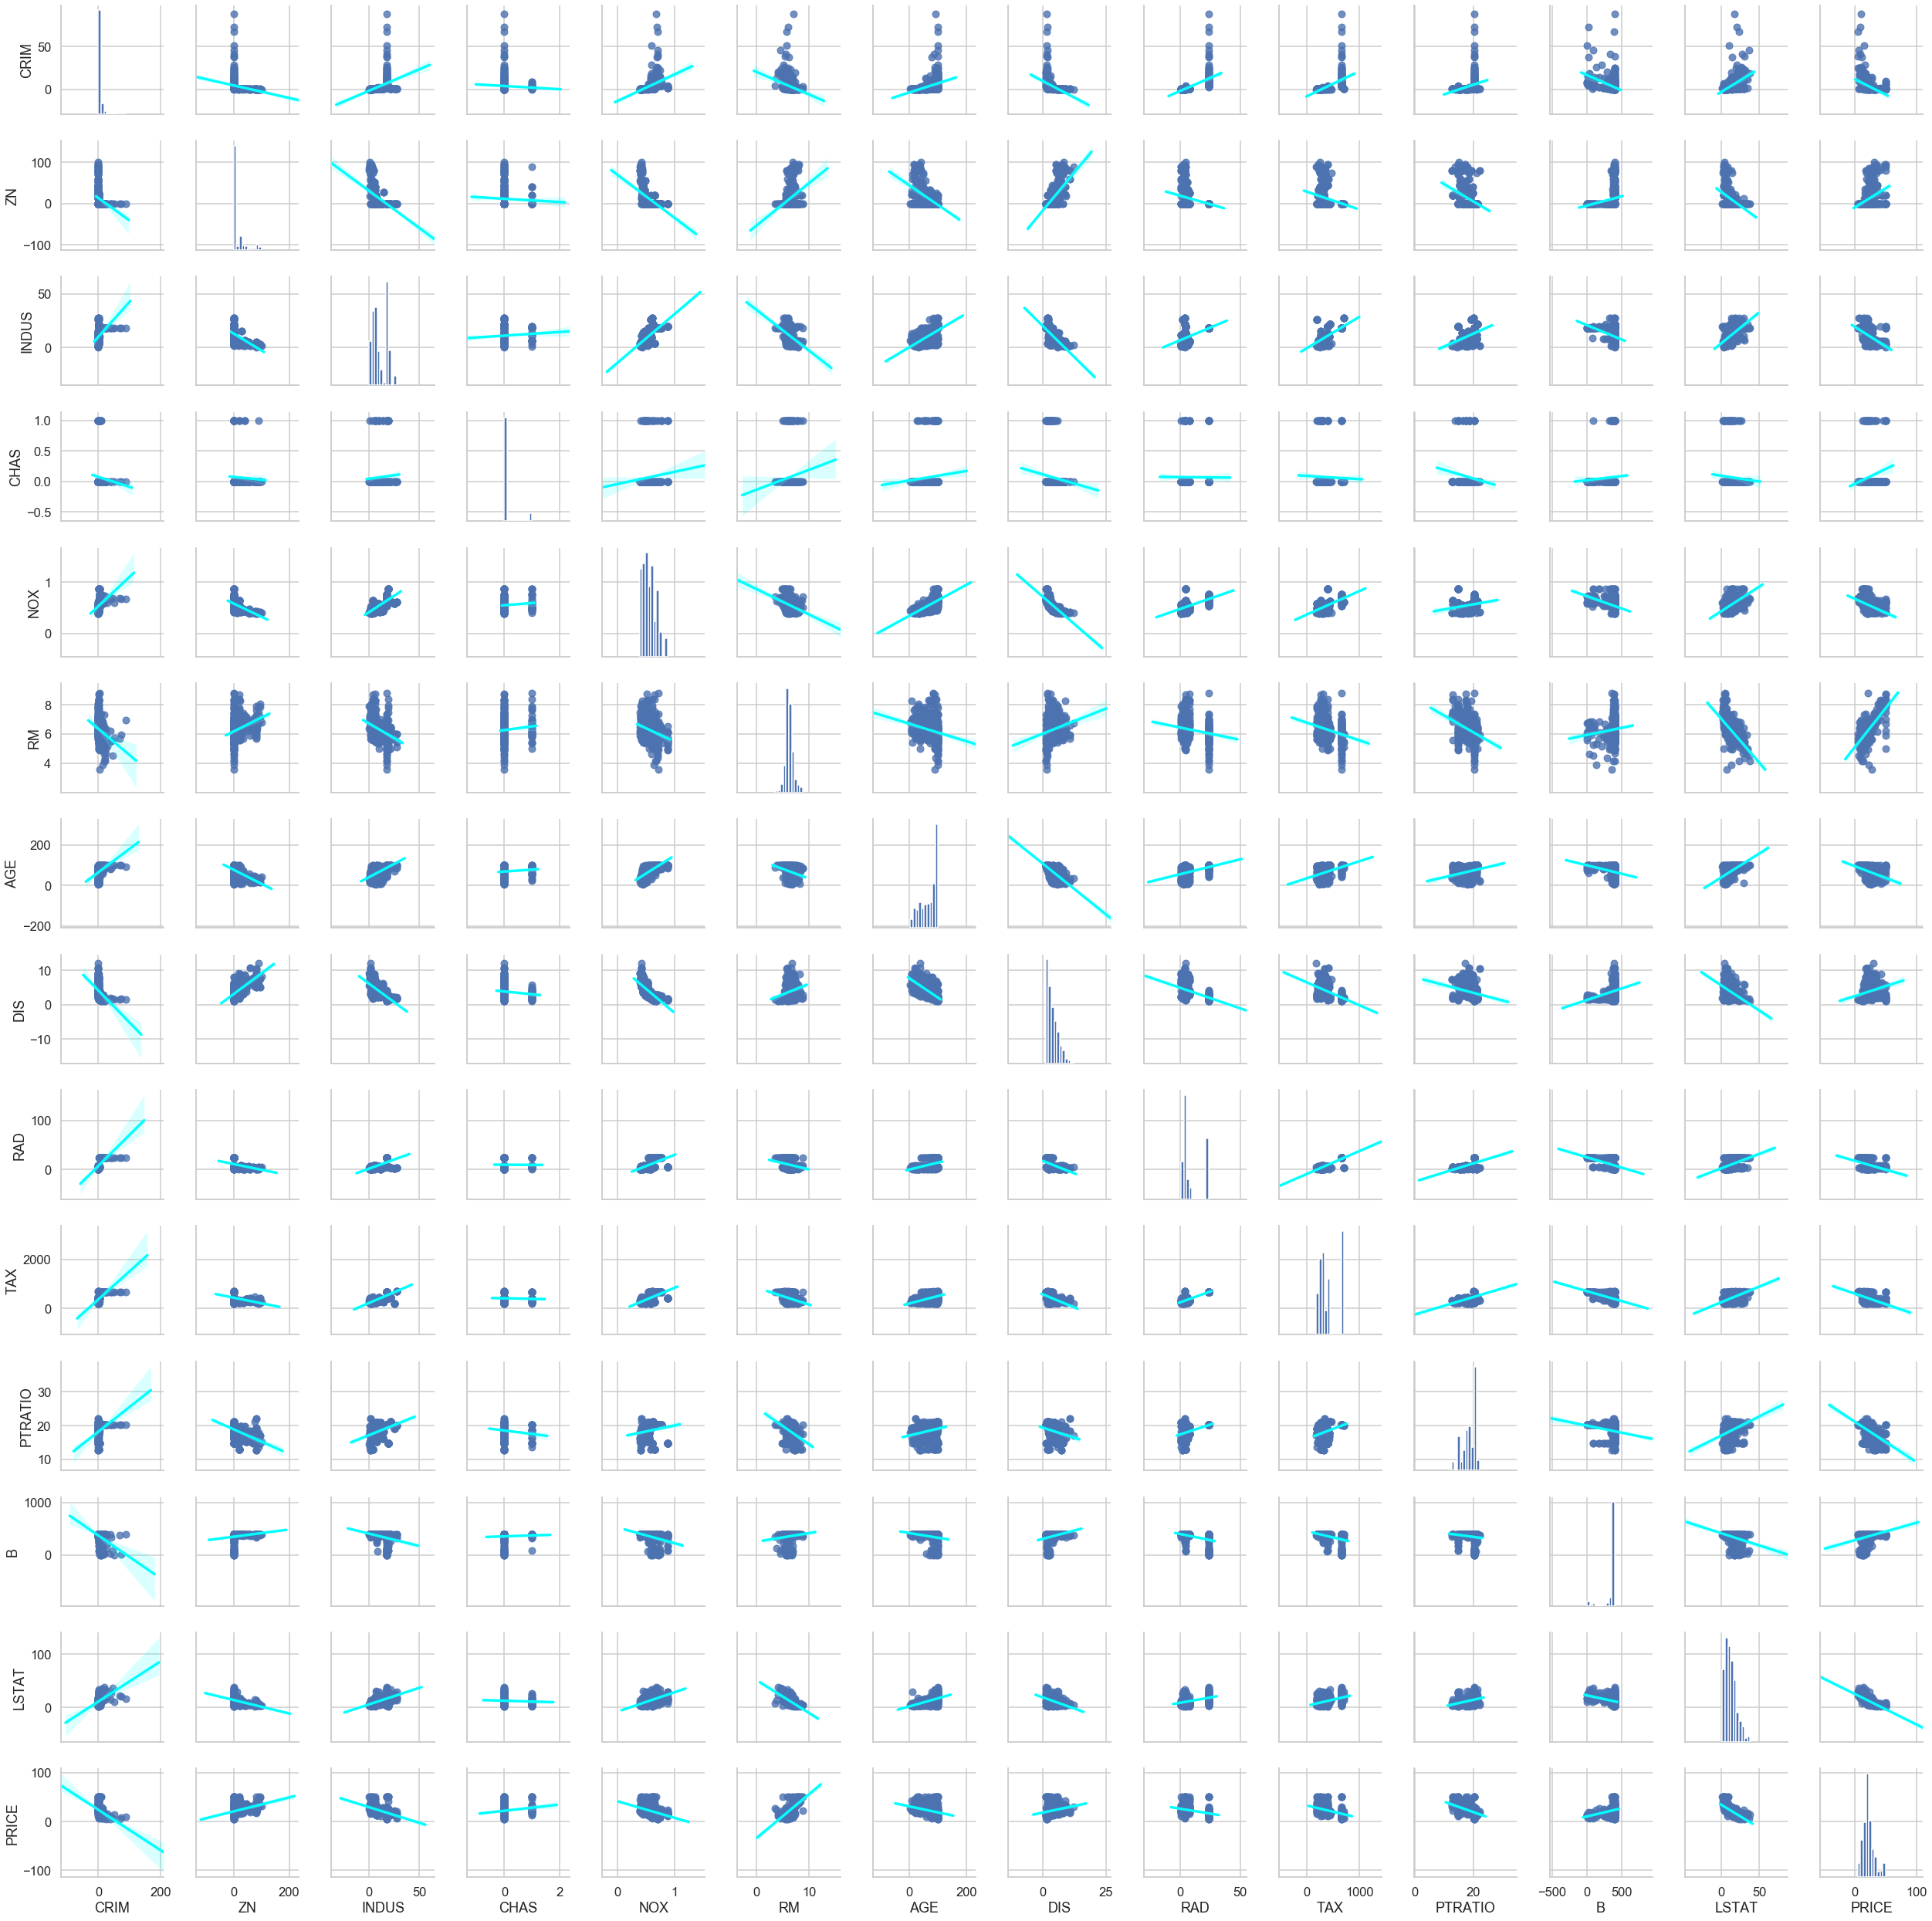

Wall time: 2min 52s


In [22]:
%%time
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()         